In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leafclassify/test.csv
/kaggle/input/leafclassify/train.csv
/kaggle/input/leaf-classification/test.csv.zip
/kaggle/input/leaf-classification/images.zip
/kaggle/input/leaf-classification/train.csv.zip
/kaggle/input/leaf-classification/sample_submission.csv.zip


In [6]:
data = pd.read_csv('../input/leafclassify/train.csv', index_col=0)
testData = pd.read_csv('../input/leafclassify/test.csv', index_col=0)
data.head(6)

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250
8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.0,0.003906,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.0,0.0,0.000000,0.001953,0.013672


In [7]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


extract features/labels 
shuffle data in early stadium, to avoid index influence whens plitting into train and valid

In [8]:
data = data.sample(frac=1)
features = data[data.columns[1:193]]
labels = data['species']
features.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1302,0.000000,0.000000,0.035156,0.003906,0.009766,0.000000,0.019531,0.000000,0.001953,0.003906,...,0.000000,0.11523,0.000000,0.040039,0.002930,0.069336,0.0,0.076172,0.006836,0.000000
1345,0.060547,0.119140,0.009766,0.001953,0.000000,0.125000,0.023438,0.000000,0.013672,0.031250,...,0.004883,0.00000,0.058594,0.000000,0.007812,0.000000,0.0,0.000000,0.014648,0.000977
282,0.017578,0.013672,0.058594,0.003906,0.009766,0.033203,0.046875,0.005859,0.000000,0.035156,...,0.032227,0.00000,0.013672,0.002930,0.030273,0.000000,0.0,0.002930,0.000000,0.011719
645,0.013672,0.035156,0.048828,0.005859,0.009766,0.039062,0.042969,0.005859,0.000000,0.013672,...,0.155270,0.00000,0.072266,0.000000,0.001953,0.000000,0.0,0.000000,0.000000,0.026367
520,0.027344,0.054688,0.048828,0.013672,0.011719,0.042969,0.007812,0.000000,0.011719,0.027344,...,0.000000,0.00000,0.033203,0.000000,0.049805,0.000000,0.0,0.000000,0.006836,0.031250


In [9]:
features = features / np.linalg.norm(features, axis=0)
testData = testData / np.linalg.norm(testData, axis=0)
features.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1302,0.000000,0.000000,0.027174,0.003381,0.013341,0.000000,0.023892,0.000000,0.005421,0.005045,...,0.000000,0.183532,0.000000,0.046141,0.004188,0.035696,0.0,0.055045,0.013202,0.000000
1345,0.073129,0.078568,0.007549,0.001690,0.000000,0.061354,0.028671,0.000000,0.037953,0.040364,...,0.002122,0.000000,0.066149,0.000000,0.011166,0.000000,0.0,0.000000,0.028290,0.001038
282,0.021231,0.009016,0.045291,0.003381,0.013341,0.016297,0.057341,0.063174,0.000000,0.045409,...,0.014005,0.000000,0.015435,0.003377,0.043271,0.000000,0.0,0.002117,0.000000,0.012450
645,0.016513,0.023184,0.037742,0.005071,0.013341,0.019173,0.052563,0.063174,0.000000,0.017659,...,0.067478,0.000000,0.081583,0.000000,0.002792,0.000000,0.0,0.000000,0.000000,0.028012
520,0.033026,0.036065,0.037742,0.011834,0.016009,0.021091,0.009556,0.000000,0.032531,0.035319,...,0.000000,0.000000,0.037484,0.000000,0.071190,0.000000,0.0,0.000000,0.013202,0.033199


In [10]:
trainFeatures = features.iloc[:891,:]
validFeatures = features.iloc[891:,:]
trainLabels =  labels.iloc[:891]
validLabels = labels.iloc[891:]

In [11]:
def computeDistances(trainData, query):
    distances = np.sqrt(np.sum((trainData - query)**2, axis=1))
    return distances
distances = computeDistances(trainFeatures, validFeatures.iloc[1,:])
trainLabels.loc[distances.argmin()]

'Zelkova_Serrata'

In [12]:
validLabels.iloc[1]

'Quercus_x_Turneri'

In [13]:
def getNearestNeighbors(trainFeatures, trainLabels, query, k):
    distances = computeDistances(trainFeatures, query)
    lowestTen = distances.sort_values().head(k).index
    results = dict()
    for x in trainLabels[lowestTen]:
        if x not in results:
            results[x] = 1/float(k)
        else:
            results[x] += 1/float(k)
    return results

In [14]:
getNearestNeighbors(trainFeatures, trainLabels, validFeatures.iloc[1,:], 10)

{'Quercus_x_Turneri': 0.6, 'Quercus_Imbricaria': 0.4}

In [15]:
def getProbabilities(trainFeatures, trainLabels, testFeatures, k):
    leaves = np.unique(data.species.sort_values().values)
    probabilities = pd.DataFrame(0, index=testFeatures.index, columns=leaves)
    for index, query in zip(testFeatures.index, testFeatures.values):
        for key, value in getNearestNeighbors(trainFeatures, trainLabels, query, k).items():
            probabilities.loc[index, key] = value
    return probabilities

In [16]:
getProbabilities(trainFeatures, trainLabels, validFeatures, 100).head()


,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
805,0.02,0.07,0.00,0.00,0.0,0.00,0.0,0.05,0.1,0.0,...,0.0,0.00,0.0,0.01,0.08,0.08,0.09,0.00,0.0,0.00
225,0.00,0.00,0.04,0.08,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.08,0.0,0.01
1492,0.00,0.00,0.07,0.08,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.03,0.0,0.00
712,0.00,0.00,0.00,0.01,0.0,0.01,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.00,0.01,0.00,0.00,0.00,0.0,0.00
815,0.00,0.00,0.00,0.09,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.06,0.0,0.00,0.00,0.00,0.00,0.02,0.0,0.00


In [17]:
def getPredictions(trainFeatures, trainLabels, testFeatures, k):
    testProbabilities = getProbabilities(trainFeatures, trainLabels, testFeatures, k)
    return testProbabilities.idxmax(axis = 1)

In [18]:
validPredictions = getPredictions(trainFeatures, trainLabels, validFeatures, 10)
validPredictions.head()

id
805            Acer_Rufinerve
225         Quercus_x_Turneri
1492        Quercus_x_Turneri
712             Populus_Nigra
815     Quercus_Castaneifolia
dtype: object

In [19]:
accuracy = sum(validPredictions==validLabels)/float(len(validLabels))
accuracy

0.8888888888888888

Log Loss Metric
The log loss is the metric uses at Kaggle, and accounts for (un)certainty. This is the formula, where L is the number of query leaves, C is the number of leaf classes, y is a binary value indicating whether leaf l actually belongs to class c (1 of so, 0 if not), and p is the probability that leaf l belongs to class c.

In [20]:
def getLogLoss(trainFeatures, trainLabels, validFeatures, validLabels, k):
    leaves = np.unique(data.species.sort_values().values)
    validProbabilities = getProbabilities(trainFeatures, trainLabels, validFeatures, k)
    totalLoss = 0
    for index, row in zip(validProbabilities.index, validProbabilities.values):
        bools = np.zeros(99)
        bools[np.where(leaves==validLabels.loc[index])] = 1
        probs = np.zeros(len(row))
        for i, x in enumerate(row):
            probs[i] = np.log(max(min(x,1-10**-15),10**-15))
        totalLoss += sum(bools*probs)
    logLoss = totalLoss / -len(validProbabilities.values)
    return logLoss

In [21]:
for i in range(20):
    print('k = ' + str(i+1) + ': ' + str(getLogLoss(trainFeatures, trainLabels, validFeatures, validLabels, i+1)))

k = 1: 1.0466295877245662
k = 2: 0.3838839626031357
k = 3: 0.43541070370021406
k = 4: 0.46195316450654406
k = 5: 0.490708942841248
k = 6: 0.5307960734597548
k = 7: 0.5908874363576452
k = 8: 0.33502483217644846
k = 9: 0.4094231397254685
k = 10: 0.48403511136472716
k = 11: 0.5601847721051033
k = 12: 0.6297494728513954
k = 13: 0.6949782286135615
k = 14: 0.7511466945828407
k = 15: 0.8110118931978669
k = 16: 0.8654347725150892
k = 17: 0.9177091057134981
k = 18: 0.9690443613889709
k = 19: 1.021921855026353
k = 20: 1.0667400869955095


cross -validation


In [22]:
def crossValidation(features, labels, folds, k):
    n = len(features)
    totalLoss = 0
    for i in range(folds):
        start = int((n*i)/folds)
        end = int((n*(i+1))/folds)
        validFeatures = features.iloc[start:end,:]   
        validLabels = labels.iloc[start:end]   
        trainFeatures = features.iloc[0:start,:].append(features.iloc[end:n,:])        
        trainLabels = labels.iloc[0:start].append(labels.iloc[end:n])        
        totalLoss += getLogLoss(trainFeatures, trainLabels, validFeatures, validLabels, k)
    averageLoss = totalLoss / folds
    return averageLoss

In [23]:
lossAll = np.zeros(20)
for i in range(20):
    lossAll[i] = crossValidation(features, labels, folds=10, k=i+1)
    print('k = ' + str(i+1) + ': ' + str(lossAll[i]))

k = 1: 0.7326407114071968
k = 2: 0.4557597144531371
k = 3: 0.4324774483554924
k = 4: 0.4004332940767313
k = 5: 0.3474309071718874
k = 6: 0.3306613693368059
k = 7: 0.38577724022614807
k = 8: 0.4177256376372303
k = 9: 0.4885728197156475
k = 10: 0.5621294756048704
k = 11: 0.6050532602155835
k = 12: 0.6738743862091282
k = 13: 0.7379490322743136
k = 14: 0.798073051309154
k = 15: 0.8558733915076147


IndexError: index 15 is out of bounds for axis 0 with size 15

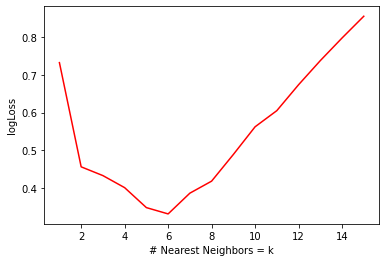

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1, 16),lossAll, 'r')
plt.xlabel('# Nearest Neighbors = k')
plt.ylabel('logLoss')
plt.show()

In [ ]:
submission = getProbabilities(features, labels, testData, 5)
submission.head()

In [ ]:
submission.to_csv("LeafClassifyFirstjae.csv")